In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
from google.colab import drive
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


import warnings
warnings.filterwarnings('ignore')

In [3]:

SEED = 1   # Set random seed for reproducibility
BATCH_SIZE = 32
IMG_SIZE = (128, 128)


data_dir = '/content/drive/MyDrive/Dataset_divided'

train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_data_gen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED)

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

validation_data_gen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_data_gen.flow_from_directory(
    os.path.join(data_dir, 'valid'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED)


Found 7350 images belonging to 4 classes.
Found 1574 images belonging to 4 classes.
Found 1578 images belonging to 4 classes.


In [4]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,  # Increase patience
    restore_best_weights=True
)

# Specify the path and filename for saving the model
model_save_path = '/content/drive/MyDrive/saved_model/CNN_Model.h5'

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True),
    ModelCheckpoint(model_save_path, monitor='val_loss', save_best_only=True, verbose=1),
    TensorBoard(log_dir='./logs', histogram_freq=1)
]

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    callbacks=[early_stopping] + callbacks,
    verbose=1)

Epoch 1/100
229/229 [==============================] - ETA: 0s - loss: 1.0569 - accuracy: 0.4795
Epoch 1: val_loss improved from inf to 0.79425, saving model to /content/drive/MyDrive/saved_model/CNN_Model.h5
229/229 [==============================] - 2645s 12s/step - loss: 1.0569 - accuracy: 0.4795 - val_loss: 0.7942 - val_accuracy: 0.6148
Epoch 2/100
229/229 [==============================] - ETA: 0s - loss: 0.8186 - accuracy: 0.6103
Epoch 2: val_loss improved from 0.79425 to 0.72886, saving model to /content/drive/MyDrive/saved_model/CNN_Model.h5
229/229 [==============================] - 66s 288ms/step - loss: 0.8186 - accuracy: 0.6103 - val_loss: 0.7289 - val_accuracy: 0.6467
Epoch 3/100
229/229 [==============================] - ETA: 0s - loss: 0.7055 - accuracy: 0.6699
Epoch 3: val_loss improved from 0.72886 to 0.58207, saving model to /content/drive/MyDrive/saved_model/CNN_Model.h5
229/229 [==============================] - 61s 266ms/step - loss: 0.7055 - accuracy: 0.6699 - val

In [6]:
# Load the saved model from Google Drive
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/CNN_Model.h5')


In [7]:

# Save the entire model to a HDF5 file
model.save('/content/drive/MyDrive/saved_model/CNN_Model.h5')



In [8]:
# Load the model from the HDF5 file
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/CNN_Model.h5')


In [9]:
# Save the entire model to Google Drive
loaded_model.save('/content/drive/MyDrive/saved_model/CNN_Model.h5')

In [10]:
model_evaluate = model.evaluate(validation_generator)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1] * 100))
print("Loss: %", "{:.2f}".format(model_evaluate[0] * 100))


50/50 [==============================] - 6s 124ms/step - loss: 0.0478 - accuracy: 0.9842
Accuracy: % 98.42
Loss: % 4.78


In [11]:

# Save the updated model with the same name
loaded_model.save('/content/drive/MyDrive/saved_model/CNN_Model.h5')

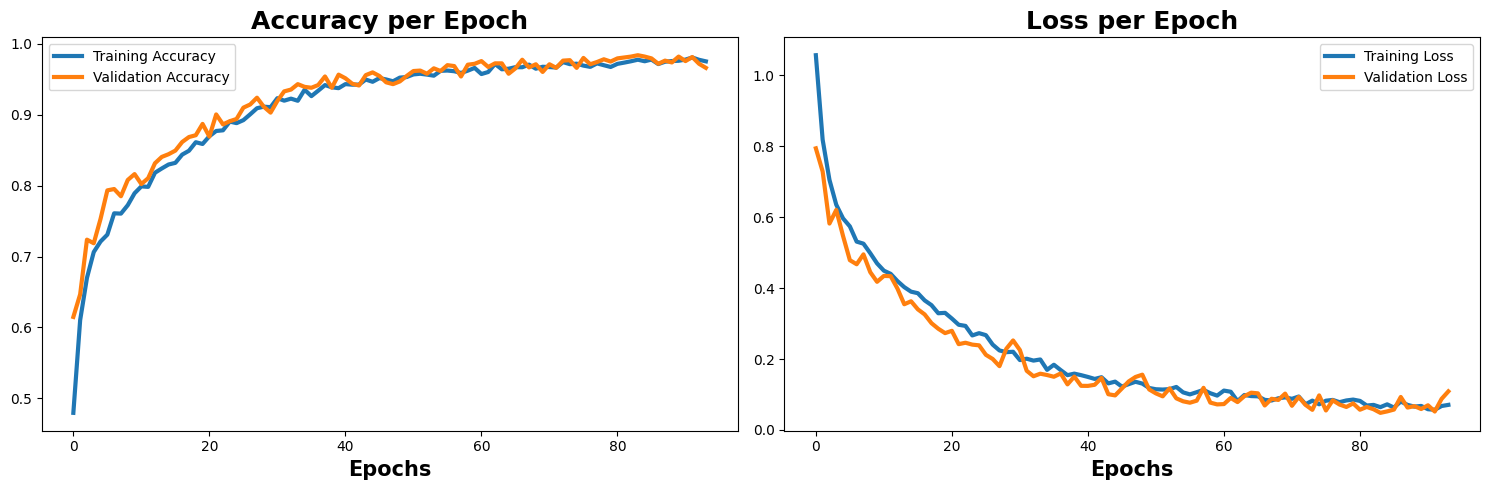

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'history' object is available after training

# Create a DataFrame from the history object
df = pd.DataFrame(history.history)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(df['accuracy'], label='Training Accuracy', lw=3)
ax1.plot(df['val_accuracy'], label='Validation Accuracy', lw=3)
ax1.set_title('Accuracy per Epoch', fontsize=18, fontweight='bold')
ax1.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax1.legend()

# Plot loss
ax2.plot(df['loss'], label='Training Loss', lw=3)
ax2.plot(df['val_loss'], label='Validation Loss', lw=3)
ax2.set_title('Loss per Epoch', fontsize=18, fontweight='bold')
ax2.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [13]:

# Save the updated model with the same name
loaded_model.save('/content/drive/MyDrive/saved_model/CNN_Model.h5')

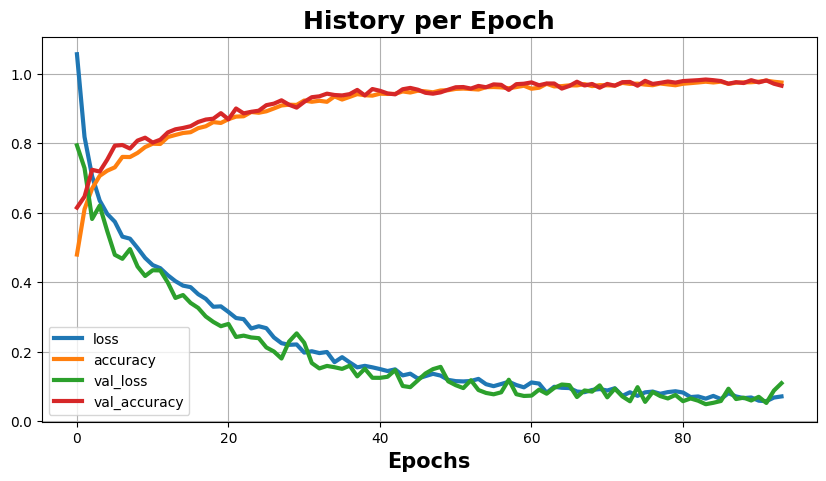

In [14]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
import pandas as pd
# Plot the history per epoch
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
plt.show()

In [15]:

# Save the updated model with the same name
loaded_model.save('/content/drive/MyDrive/saved_model/CNN_Model.h5')

Found 1574 images belonging to 4 classes.
Precision: 0.9809
Recall: 0.9802
F1 Score: 0.9805
Accuracy: 0.9803



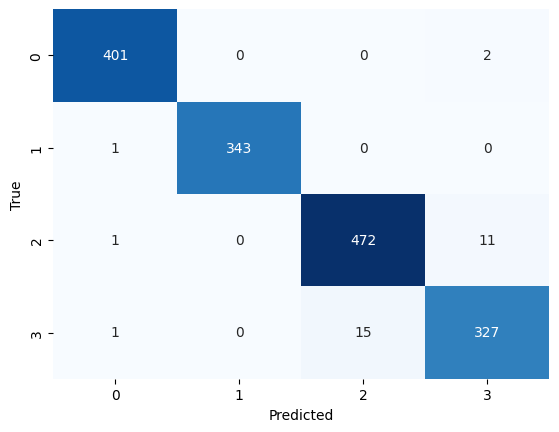

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set the path to your test dataset directory
test_dataset_dir = '/content/drive/MyDrive/Dataset_divided/test'

# Create a data generator for testing
test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load the test data
test_generator = test_data_gen.flow_from_directory(
    test_dataset_dir,
    target_size=(128, 128),
    batch_size=1,  # Set batch_size to 1 for individual predictions
    class_mode=None,  # Do not specify class_mode for raw predictions
    shuffle=False
)

# Perform individual predictions and calculate metrics for each model
individual_predictions = []

for j in range(len(test_generator.filenames)):
    batch_images = next(test_generator)
    prediction = model.predict(batch_images, verbose=0)
    individual_predictions.append(np.argmax(prediction))

# Get the true labels
true_labels = test_generator.classes

# Calculate and store metrics for the model
precision = precision_score(true_labels, individual_predictions, average='macro')
recall = recall_score(true_labels, individual_predictions, average='macro')
f1 = f1_score(true_labels, individual_predictions, average='macro')
accuracy = accuracy_score(true_labels, individual_predictions)

model_metrics = {
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Accuracy": accuracy
}

# Print metrics
print(f"Precision: {model_metrics['Precision']:.4f}")
print(f"Recall: {model_metrics['Recall']:.4f}")
print(f"F1 Score: {model_metrics['F1 Score']:.4f}")
print(f"Accuracy: {model_metrics['Accuracy']:.4f}")
print()

# Display confusion matrix
conf_matrix = confusion_matrix(true_labels, individual_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

# Save the updated model with the same name
loaded_model.save('/content/drive/MyDrive/saved_model/CNN_Model.h5')